In [137]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


# Calculating fractal dimension

In [209]:
from utils import fractal_dimension

# Fractal dimensions for images

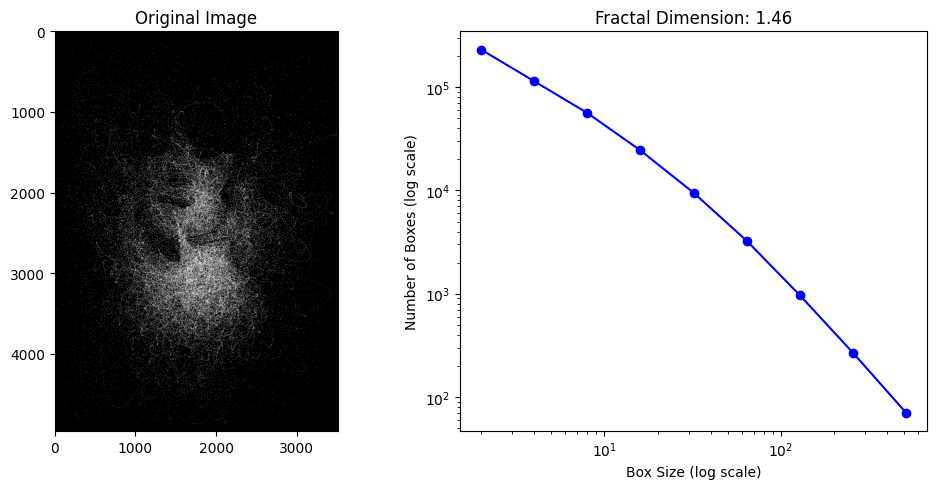

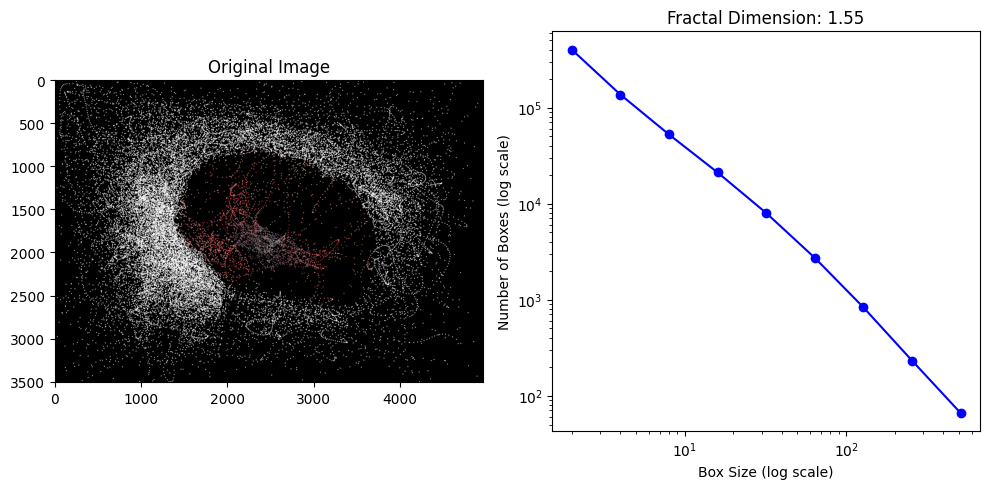

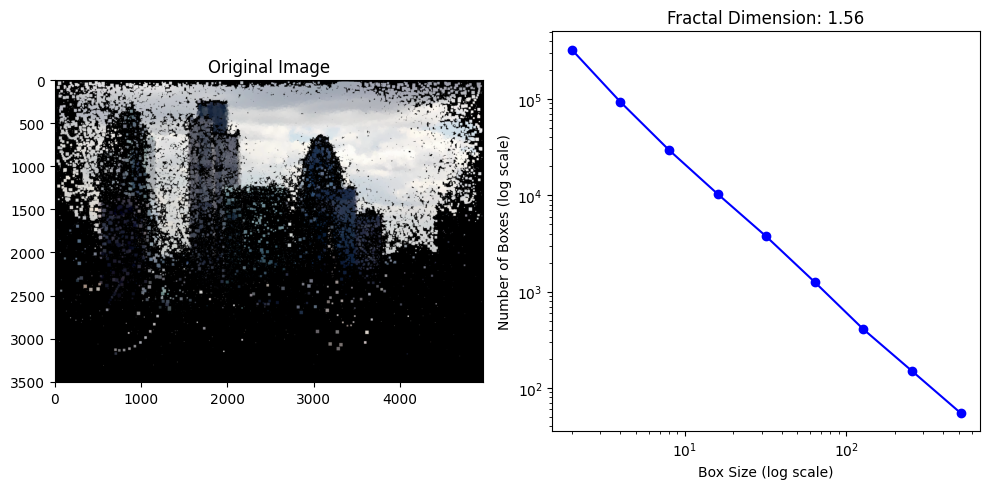

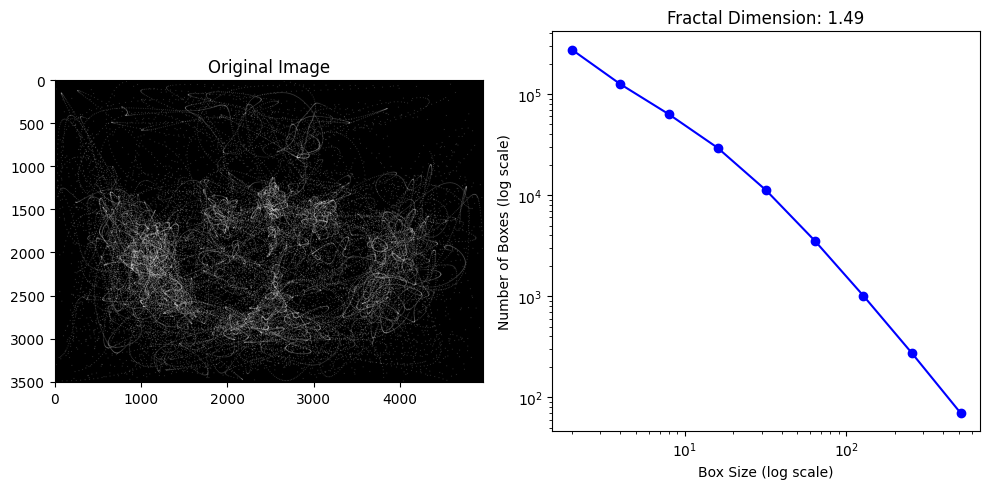

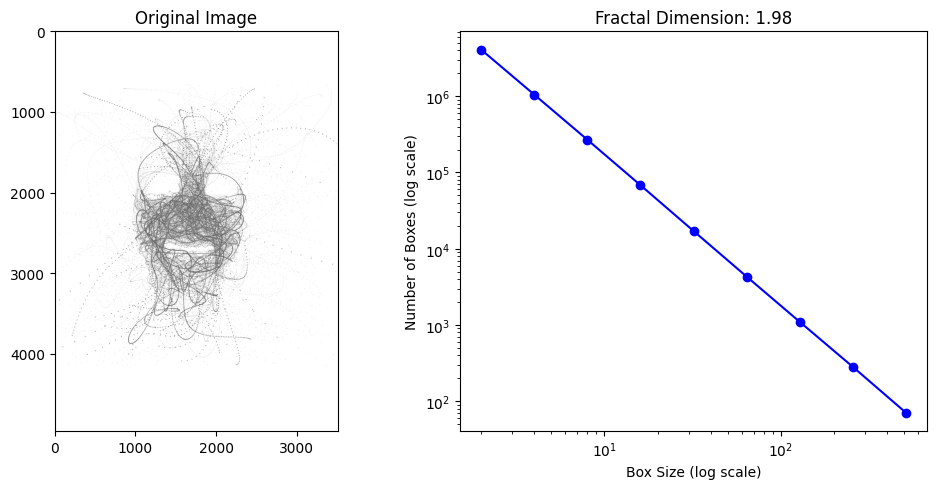

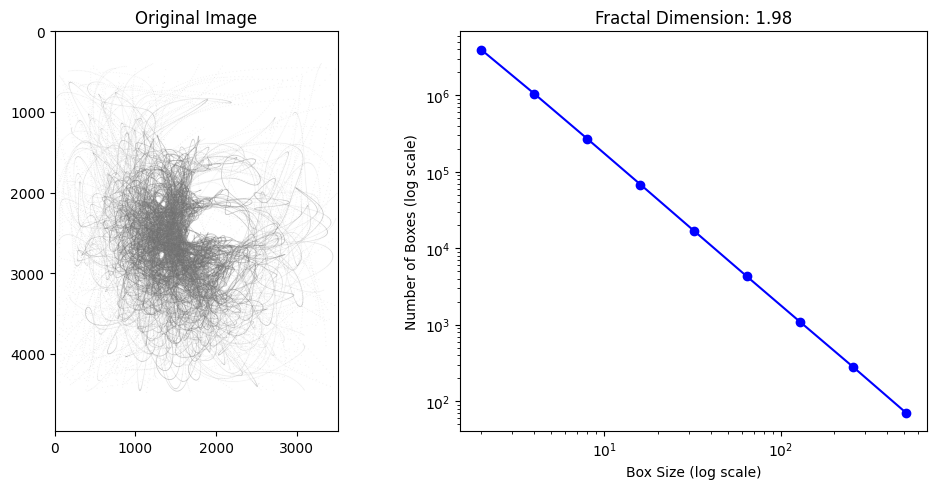

In [208]:
images = ['narodziny', 'mak', 'miasto', 'paz', 'zulu', 'skazany']

for image in images:
    # Load and preprocess the image
    image_path = f"./images/{image}/gen.png"
    image = io.imread(image_path)

    # Set the threshold value (adjust as needed)
    threshold_value = 0.9

    # Calculate the fractal dimension
    fractal_dim, sizes, counts = fractal_dimension(image, threshold=threshold_value)

    # Display the original image and the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.loglog(sizes, counts, marker='o', linestyle='-', color='b')
    plt.title(f'Fractal Dimension: {fractal_dim:.2f}')
    plt.xlabel('Box Size (log scale)')
    plt.ylabel('Number of Boxes (log scale)')

    plt.tight_layout()
    plt.show()


# For not very interesting images

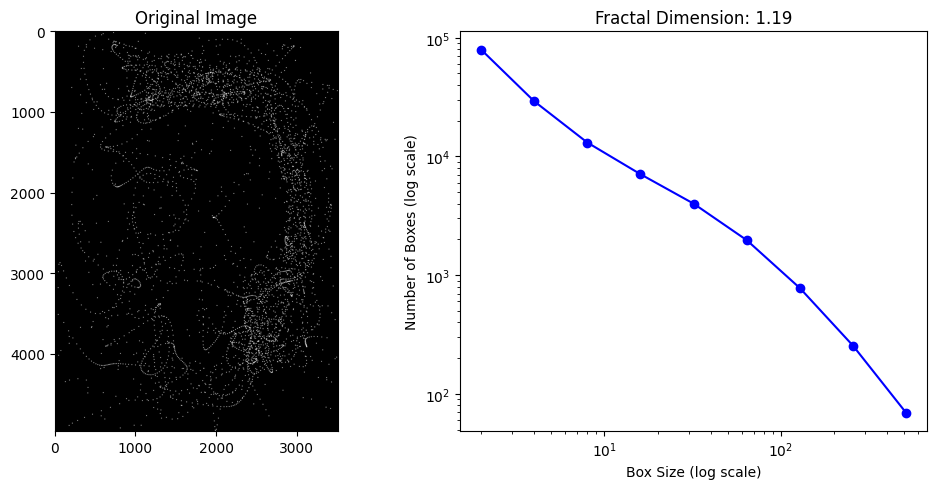

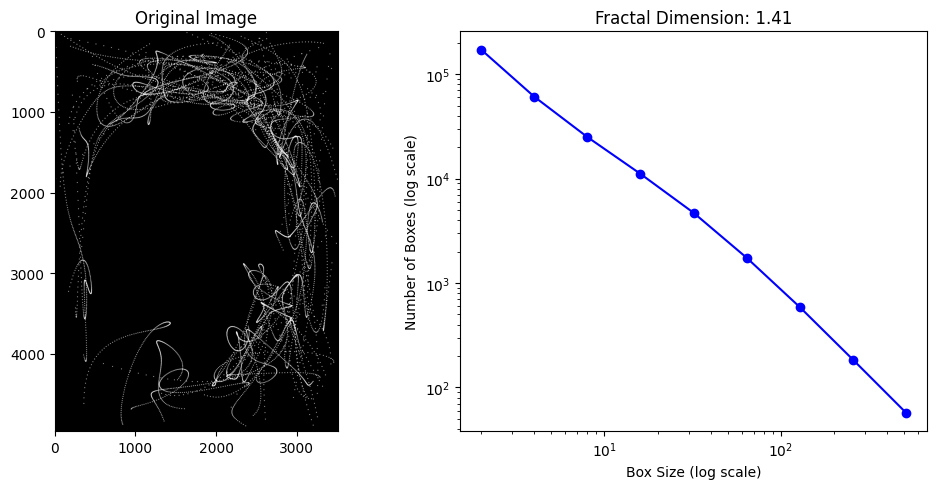

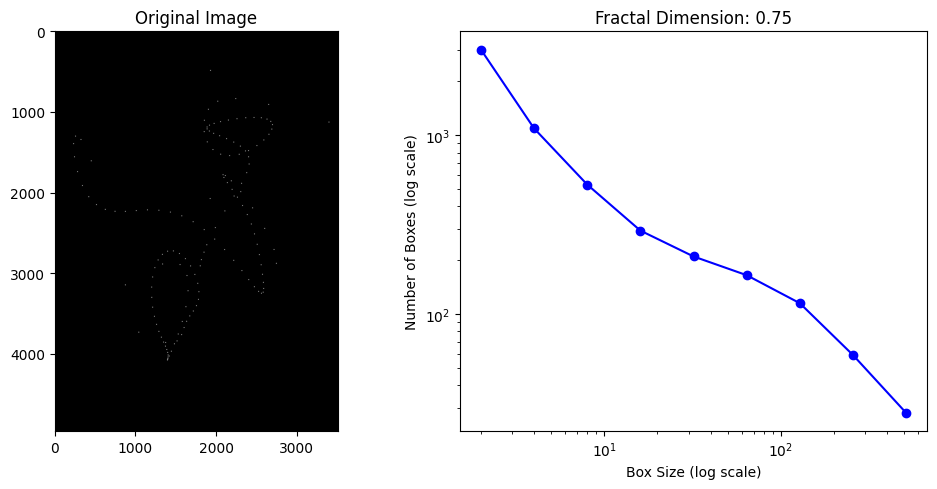

In [140]:
images = ['gen', 'gen2', 'gen3']

for image in images:
    # Load and preprocess the image
    image_path = f"./images/nothing/{image}.png"
    image = io.imread(image_path)

    # Set the threshold value (adjust as needed)
    threshold_value = 0.9

    # Calculate the fractal dimension
    fractal_dim, sizes, counts = fractal_dimension(image, threshold=threshold_value)

    # Display the original image and the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.loglog(sizes, counts, marker='o', linestyle='-', color='b')
    plt.title(f'Fractal Dimension: {fractal_dim:.2f}')
    plt.xlabel('Box Size (log scale)')
    plt.ylabel('Number of Boxes (log scale)')

    plt.tight_layout()
    plt.show()

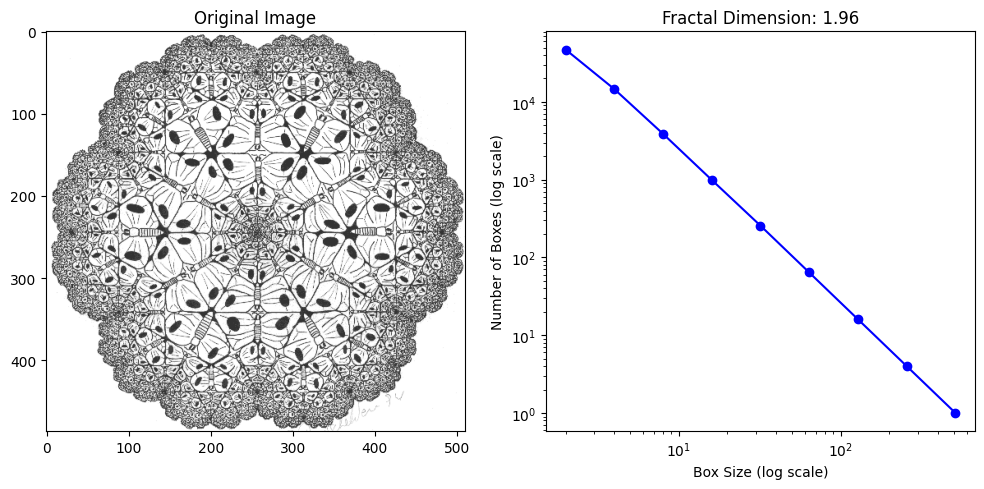

In [141]:
# Load and preprocess the image
image_path = "./images/compare/fractal.png"
image = io.imread(image_path)

# Set the threshold value (adjust as needed)
threshold_value = 0.9

# Calculate the fractal dimension
fractal_dim, sizes, counts = fractal_dimension(image, threshold=threshold_value)

# Display the original image and the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.loglog(sizes, counts, marker='o', linestyle='-', color='b')
plt.title(f'Fractal Dimension: {fractal_dim:.2f}')
plt.xlabel('Box Size (log scale)')
plt.ylabel('Number of Boxes (log scale)')

plt.tight_layout()
plt.show()

# Rating 223 randomly generated images


In [142]:
number_of_files = 223
ratings = []

for i in range(1, number_of_files + 1):
    # Load and preprocess the image
    image_path = f"./random-tries/{i}.png"
    image = io.imread(image_path)

    # Set the threshold value (adjust as needed)
    threshold_value = 0.9

    # Calculate the fractal dimension
    fractal_dim, sizes, counts = fractal_dimension(image, threshold=threshold_value)

    ratings.append({"fd": fractal_dim, "s": sizes, "c": counts})


/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_96448/3280443895.py:31: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)


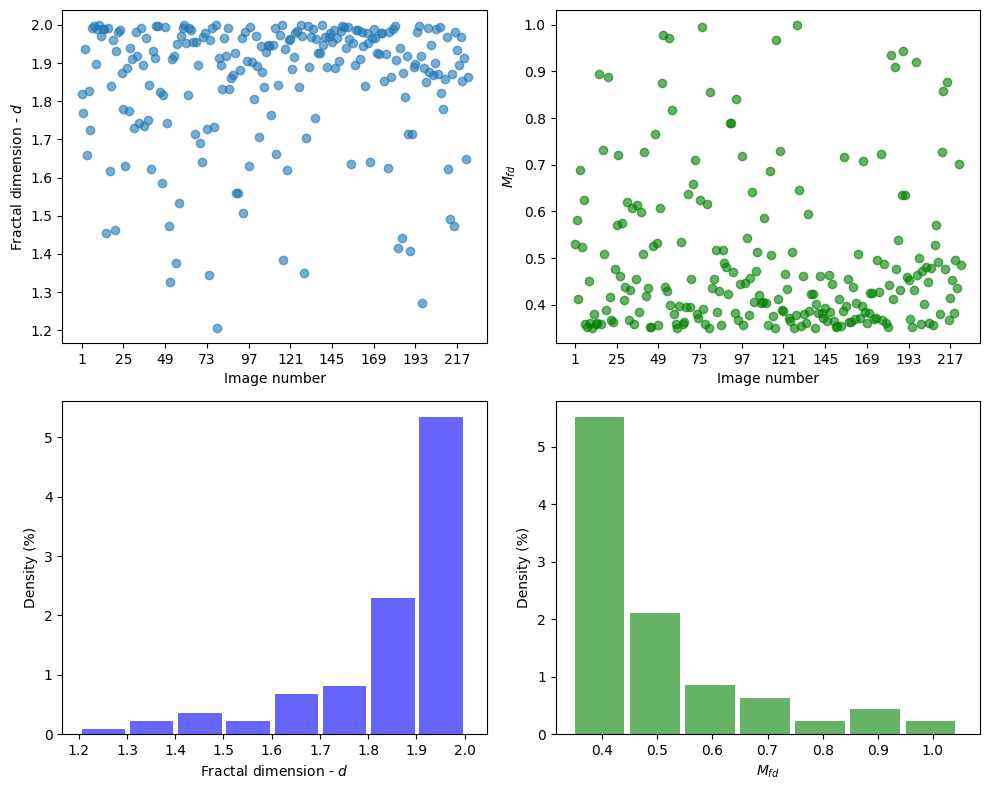

In [206]:
from scipy.stats import norm

# Generate X values
x_values = np.arange(1, number_of_files + 1)

fd_values = [1.56 if np.isnan(d['fd']) else d['fd'] for d in ratings]
fd_values_m = [(1 - abs(1.35 - v)) for v in fd_values]

# Fit normal distribution
mu_fd, std_fd = norm.fit(fd_values)
mu_fd_m, std_fd_m = norm.fit(fd_values_m)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(x_values, fd_values, alpha=0.6)
plt.xlabel('Image number')
plt.ylabel('Fractal dimension - $d$')
plt.xticks(np.arange(1, 221, step=24))

plt.subplot(2, 2, 2)
plt.scatter(x_values, fd_values_m, color='g', alpha=0.6)
plt.xlabel('Image number')
plt.ylabel('$M_{fd}$')
plt.xticks(np.arange(1, 221, step=24))

# New histograms for fd_values
axes[1, 0].hist(fd_values, bins=np.arange(min(fd_values), max(fd_values) + 0.1, 0.1), density=True, alpha=0.6, color='b', width=0.09)
xmin, xmax = axes[1, 0].get_xlim()
x_fd = np.linspace(xmin, xmax, 100)
p_fd = norm.pdf(x_fd, mu_fd, std_fd)
# axes[1, 0].plot(x_fd, p_fd, 'k', linewidth=3)
axes[1, 0].set_xlabel('Fractal dimension - $d$')
axes[1, 0].set_ylabel('Density (%)')

# New histograms for fd_values_m
axes[1, 1].hist(fd_values_m, bins=np.arange(min(fd_values_m), max(fd_values_m) + 0.1, 0.1), density=True, alpha=0.6, color='g', width=0.09)
xmin, xmax = axes[1, 1].get_xlim()
x_fd_m = np.linspace(xmin, xmax, 100)
p_fd_m = norm.pdf(x_fd_m, mu_fd_m, std_fd_m)
# axes[1, 1].plot(x_fd_m, p_fd_m, 'k', linewidth=3)
axes[1, 1].set_xlabel('$M_{fd}$')
axes[1, 1].set_ylabel('Density (%)')

# Show the plot
plt.tight_layout()
plt.show()

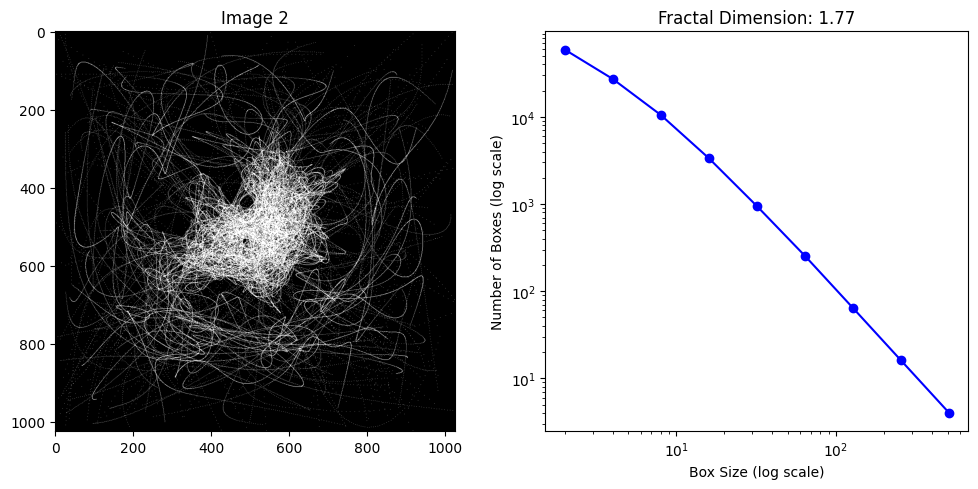

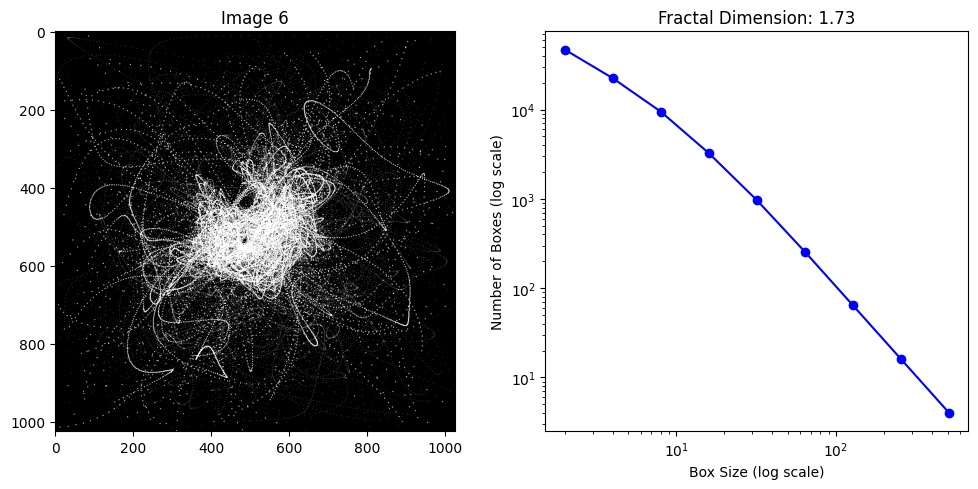

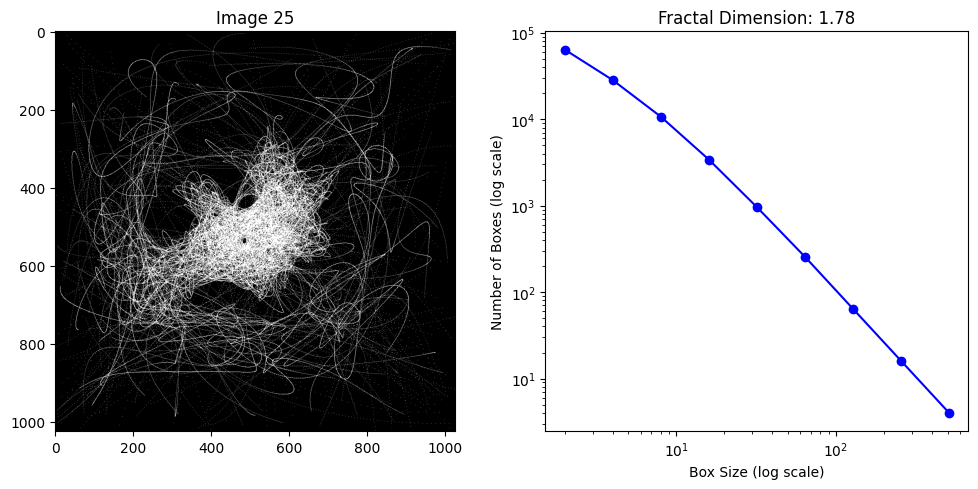

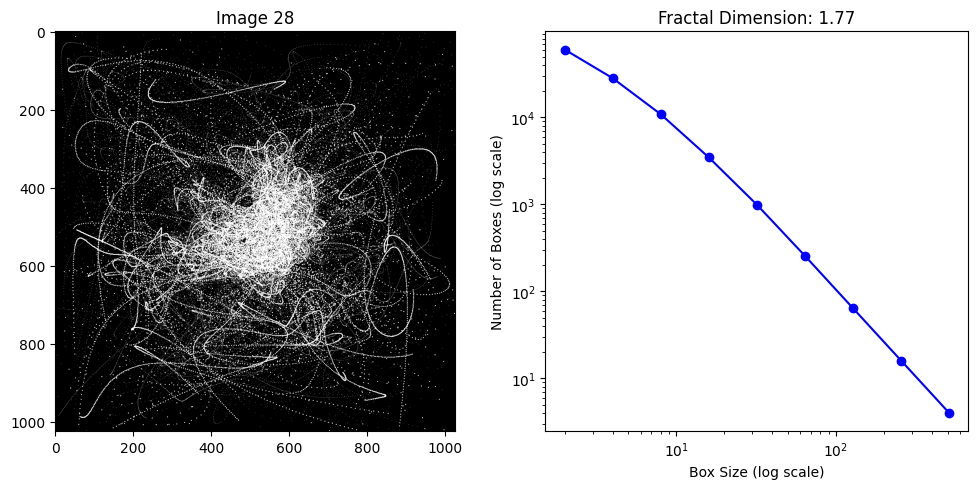

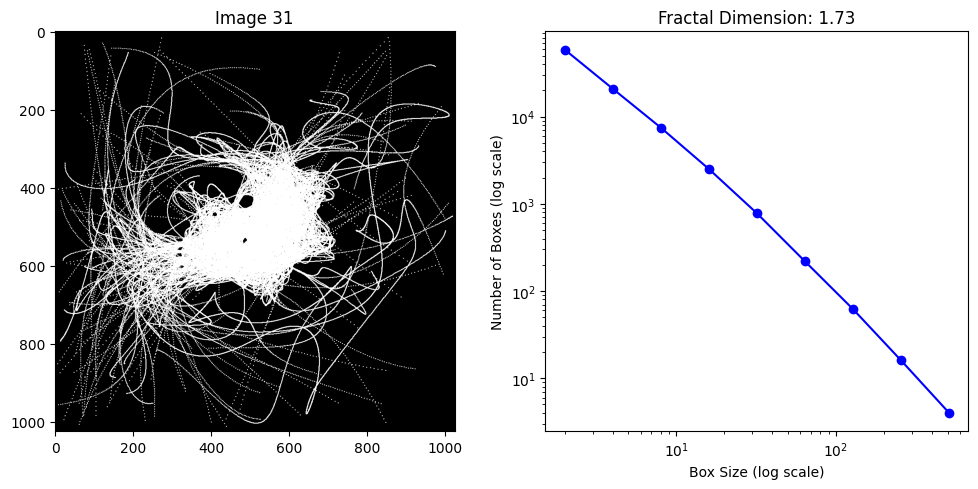

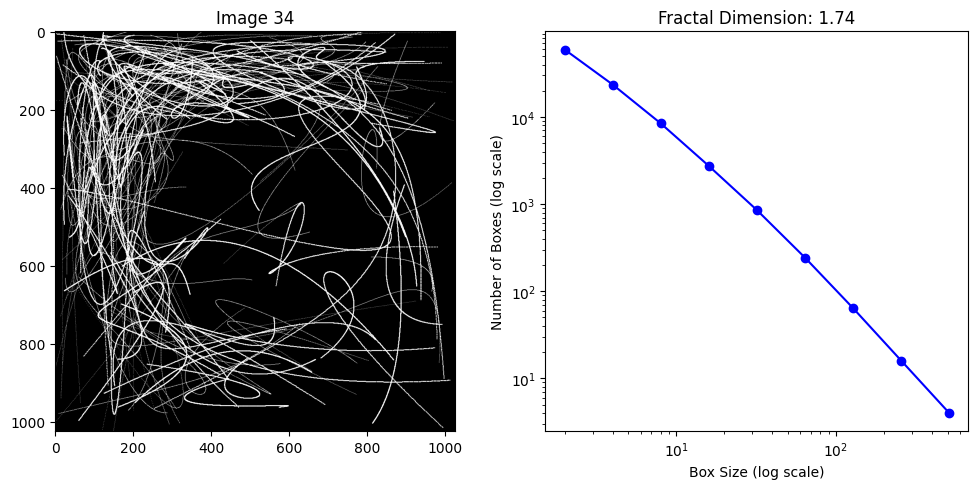

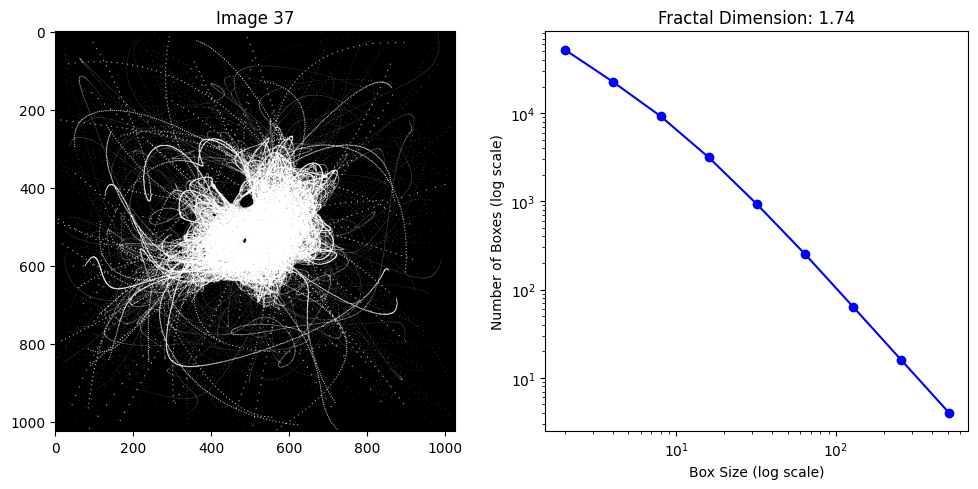

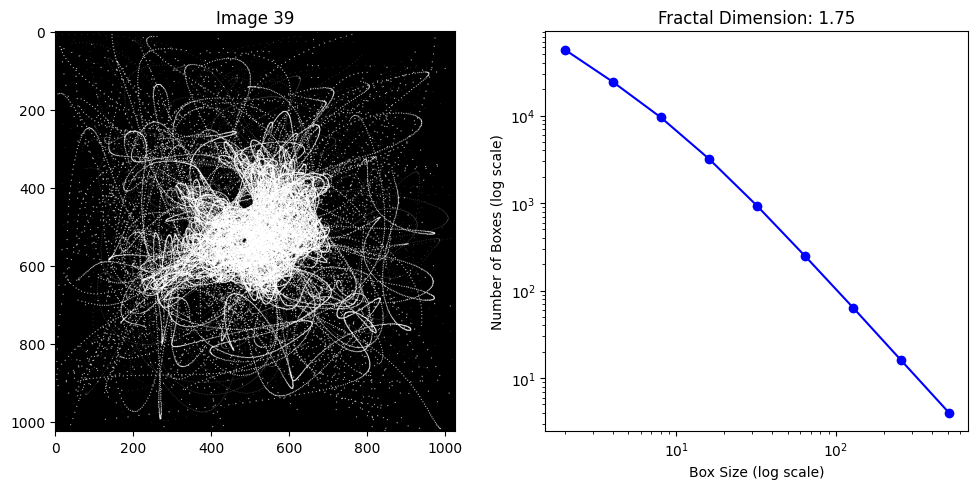

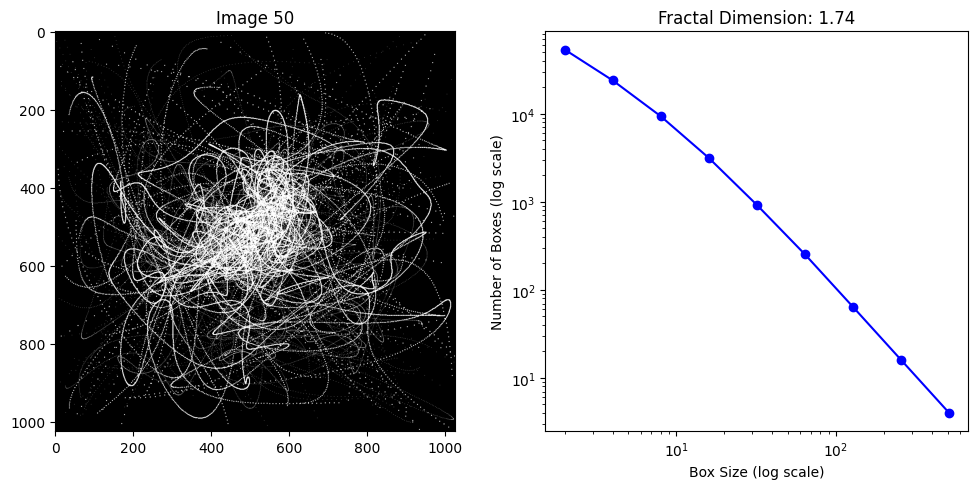

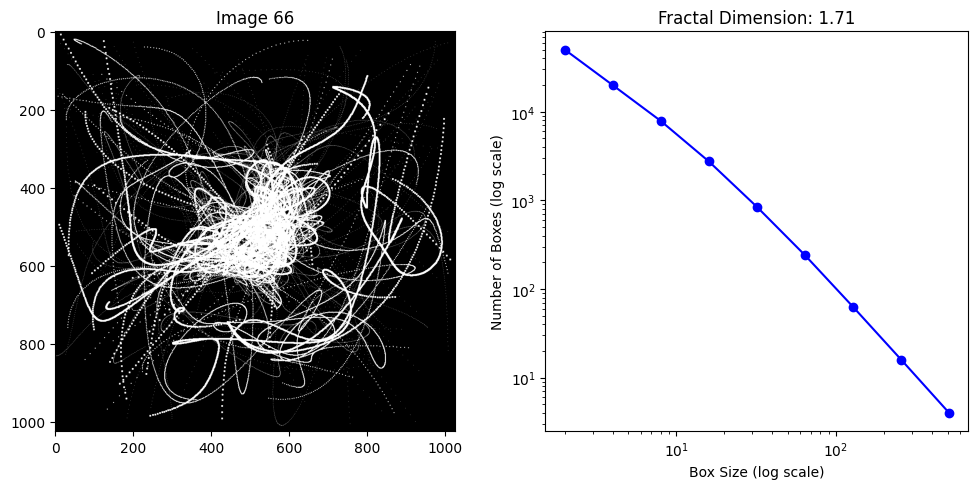

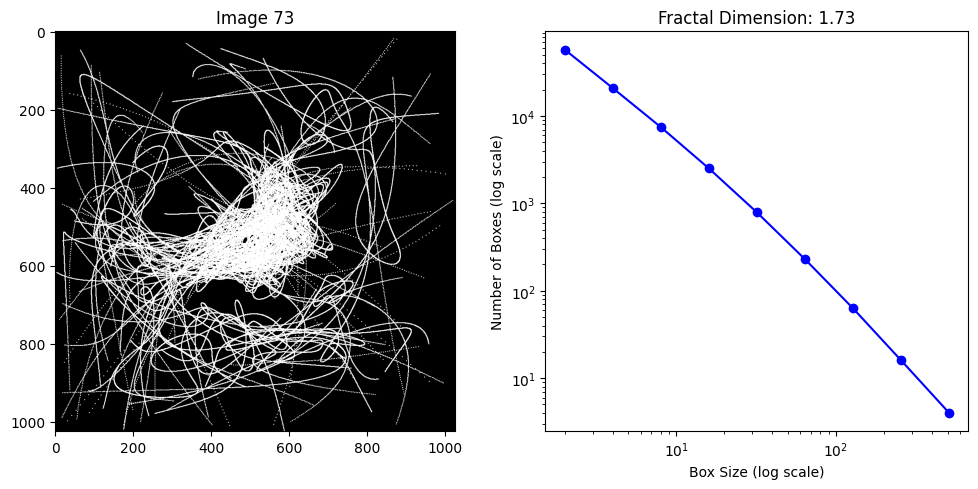

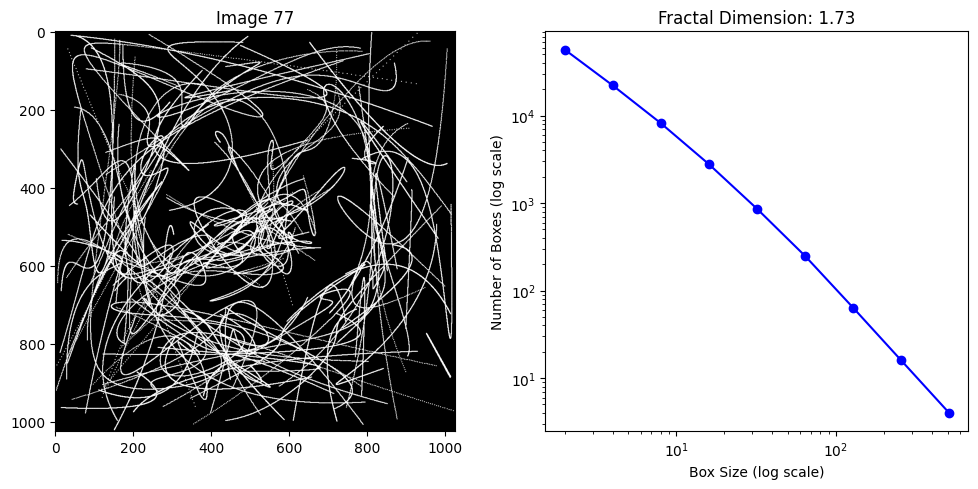

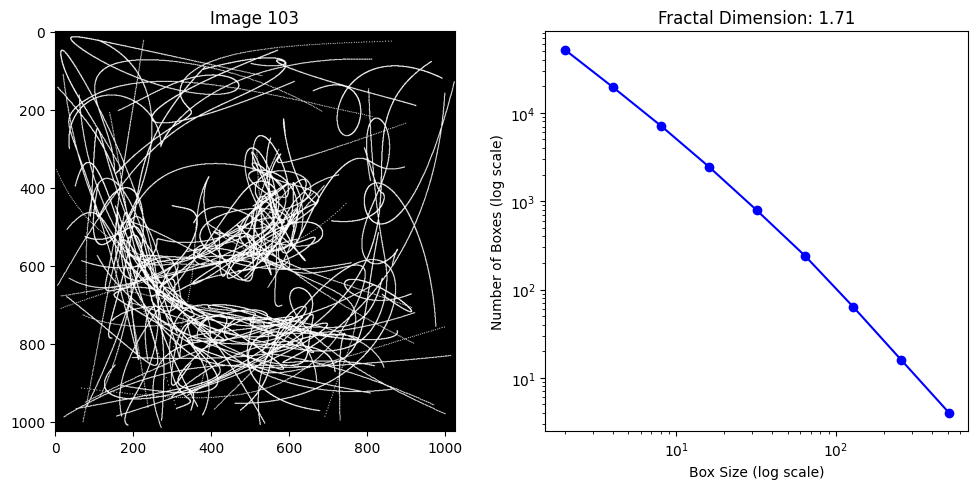

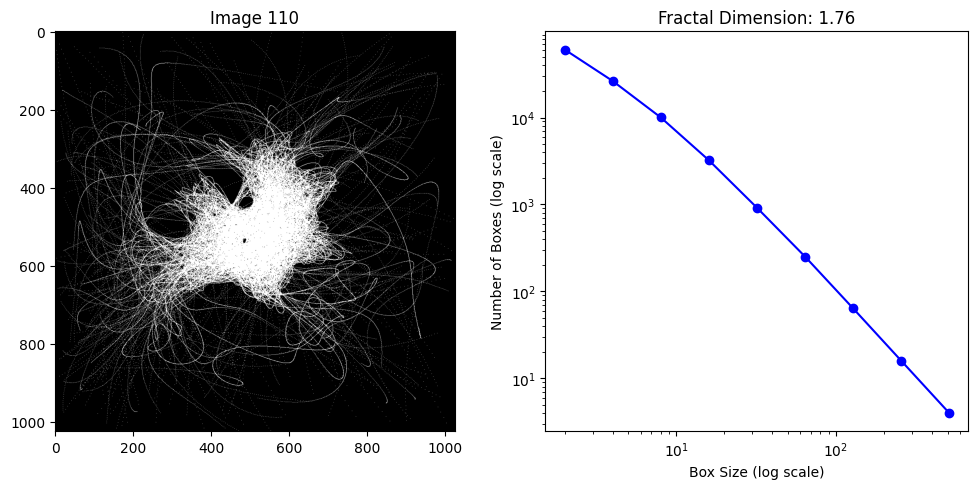

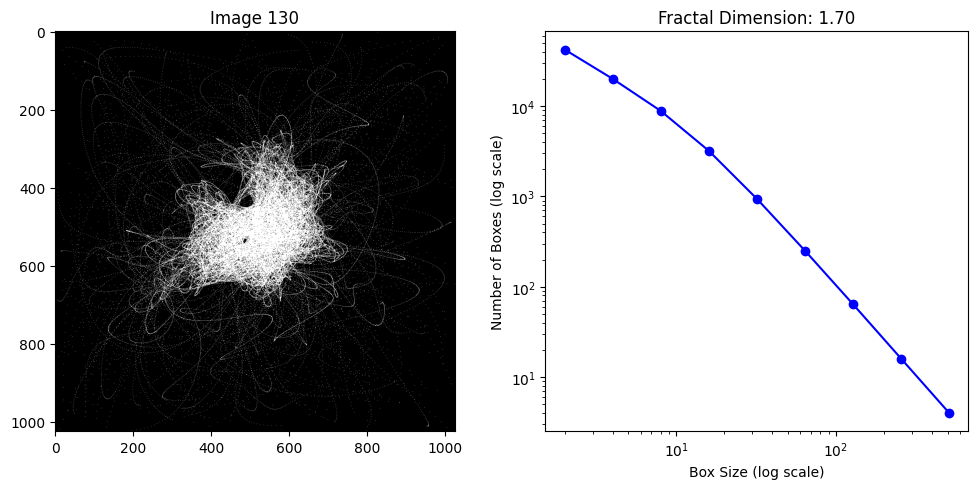

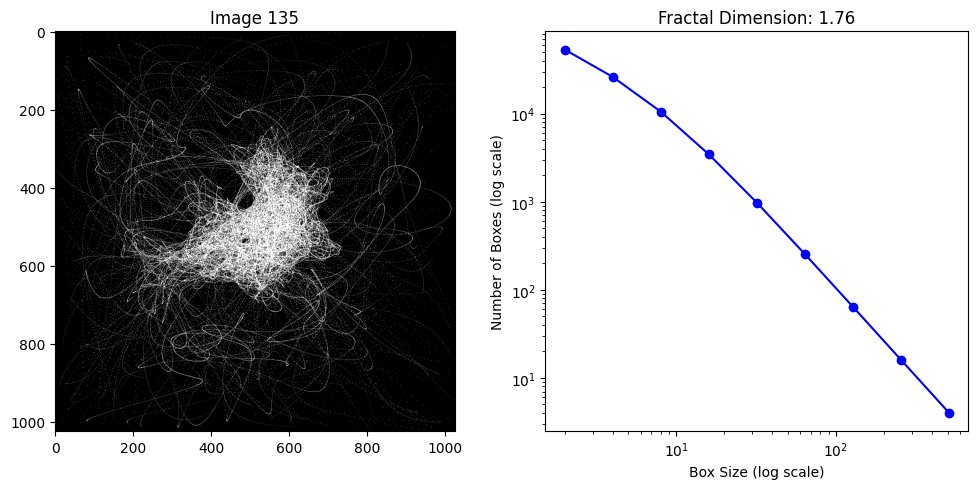

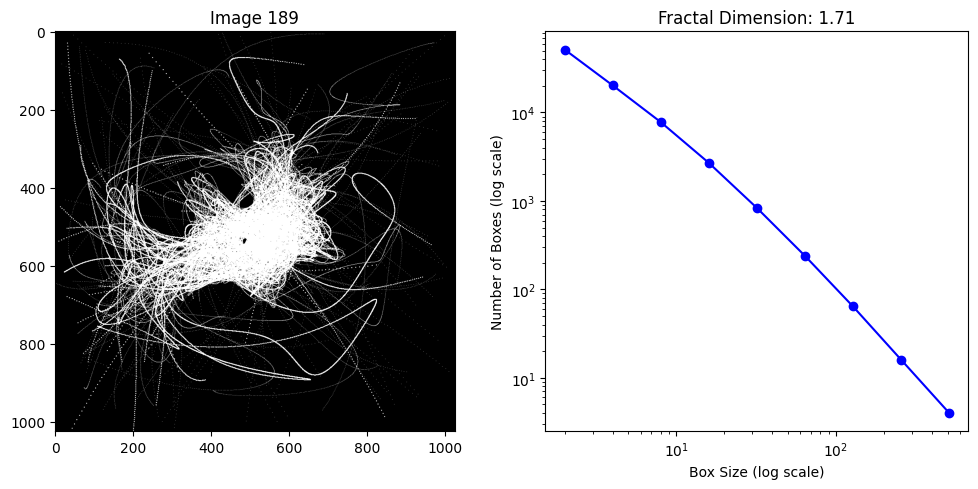

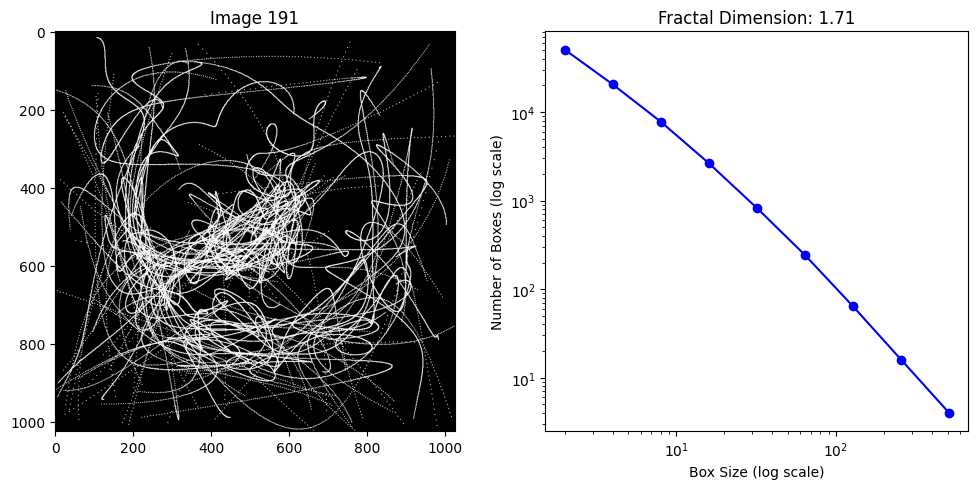

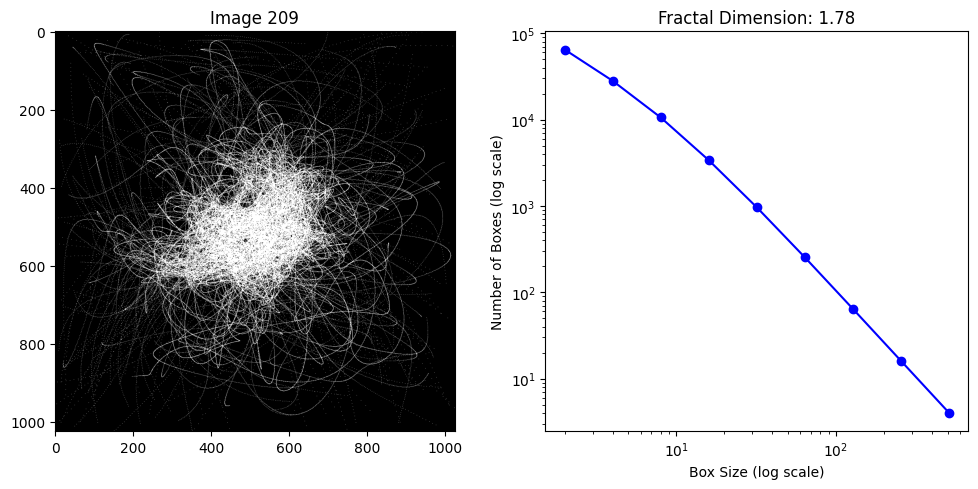

In [204]:
for i, rating in enumerate(ratings):
    if 1.7 <= rating["fd"] < 1.8:
        # Load and preprocess the image
        image_path = f"./random-tries/{int(i + 1)}.png"
        image = io.imread(image_path)

        # Display the original image and the result
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f'Image {int(i + 1)}')
        
        plt.subplot(1, 2, 2)
        plt.loglog(rating["s"], rating["c"], marker='o', linestyle='-', color='b')
        plt.title(f'Fractal Dimension: {rating["fd"]:.2f}')
        plt.xlabel('Box Size (log scale)')
        plt.ylabel('Number of Boxes (log scale)')
        
        plt.tight_layout()
        plt.show()

In [146]:
import csv

# Create a CSV file for writing
csv_file_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/ratings_with_benford.csv'
csv_headers = ['L.p.', 'crossoverChance', 'mutationChance', 'numberOfMixes', 'nofPointsMax', 'nofPointsMin',
               'thicknessMax', 'thicknessMin', 'divider', 'size', 'Benford']

updated_csv_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/ratings_all.csv'

    # Create a new CSV file for writing the updated data
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)

    # Add 'Benford' to the headers
    headers.append('Fractal')

    # Create a new CSV file for writing the updated data
    with open(updated_csv_path, 'w', newline='') as updated_csv_file:
        csv_writer = csv.writer(updated_csv_file)

        # Write the updated headers to the new CSV file
        csv_writer.writerow(headers)

        # Loop through rows and update data
        for row, rating_dict in zip(csv_reader, ratings):
            # Extract the "rating" value from the dictionary
            benford_value = rating_dict.get("fd", None)

            # Append the Benford value to the row
            row.append(benford_value)

            # Write the updated row to the new CSV file
            csv_writer.writerow(row)

print(f'Updated CSV file created at: {updated_csv_path}')

Updated CSV file created at: /Users/michalryngier/studia/praca-magisterska/art/ratings/ratings_all.csv
